# Random Forest Classifier

Random Forests are an ensemble of decision trees typically trained using a (tweaked) bagging or pasting approach. The idea is that we train numerous weak learners and aggregate their predictive power. For classification problems, the predicted class that gets the most votes is chosen. For regression tasks, the mean of the individual decision trees is considered.

The reason why an ensemble of weak learners produces a powerful model is due to the law of large numbers. According to the theory, if we repeat an experiment many times and average the results, the results obtained will be close to the theoretical expected value. Thus, if we create a weak learner that is only slightly better than random guessing (51%), a series of 1000 such learners will ultimately produce a much larger predictive power.


# Training Process

It’s important to note that random forests utilize a bagging-based resampling approach. This process involves taking multiple bootstapped (bagged) samples of the original dataset with replacement and each sample is used to train a seperate decision tree. 

A typical bagging based approach would train multiple trees and all trees would end up splitting at the most important feature. This results in a highly correlated prediction thereby producing high variance. Random forests address this problem by forcing each split based on a random sample of a predictor subset of $m$ predictors (column subsampling). The model then splits the trees based on the best feature within the subset. This increases tree diversity as some trees will contain predictors that would have been dismissed otherwise.

To summarize, the primary difference between bagging and random forests is the criteria for choosing the predictor subset. In bagging we use all predictors $m = p$ while in random forests we use $m = p^1/2$ predictors. This process is advantageous as it prevents all trees from splitting at the most important variable (thereby reducing variance). This decorrelation allows the model to reduce overfitting and produces greater tree diversity.


# Random Forest Hyperparameters

Random forests have almost all hyperparameters of decision trees and bagging classifiers. Tweaking these allows us to control tree growth and the ensemble process. At each tree split only a random subset of the features is considered. This randomness can be further exaggerated or constrained allowing us to control the bias-variance trade-off. Higher randomness typically increases bias but produces a more reliable model.

- Node Size

- Number of trees 

- Number of features sampled


# Feature Importance

Another interesting characteristic of random forest is that it measures the relative importance of each input feature. It computes feature importance using the largest relative mean decrease. For regression, we use the RSS decrease. A large value indicates a stronger predictor.


# Random Forest Pros and Cons


**Pros**

- Produce lower variance relative to decision trees and regular bagging as it decorrelates features.

- Produces a stronger model at the cost of interpretability. Unlike a regular decision tree model, we cannot produce a decision tree diagram. When we bag numerous trees, it is not possible to visualize the statistical learning process through a decision tree diagram. 

- Allows us to determine feature importance. This could be used as a method conduct feature extraction.

- Doesn't require data-pre-processing (feature scaling)

- Generally robust against outliers.

**Cons**

- Trades better performance for lack of interpretability

- Works well with non-linear datasets

- Lots of Tuning parameters

- Cannot be used in time series-based datasets.



# 1. Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. Preprocessing

In [3]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

NameError: name 'dataset' is not defined

# 3. Training

In [2]:
# Training the Random Forest Classification
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'RandomForestClassifier' is not defined

# 4. Testing

In [5]:
# Predicting a new result using age 40 and salary 87000
print(rf.predict(sc.transform([[40,87000]])))
rf.predict_proba(sc.transform([[40,87000]]))

# Predicting the Test set results
y_pred = rf.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred))

[0]
Classification Accuracy : 0.875


# 4. K-Fold Cross Validation

In [6]:
# 10 fold cross validation
accuracies = cross_val_score(estimator = rf,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')

# Cross validation accuracy and standard deviation
print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

[0.9   0.75  0.9   0.9   0.975 0.85  0.825 0.8   0.8   0.925]
0.8625
Accuracy: 86.250 %
Standard Deviation: 6.543 %


# 5. Hyperparametric Tuning

In [7]:
# Grid Search CV
param_grid = [{'bootstrap': [True],
     'max_depth': [6, 10],
     'max_features': ['auto'],
     'min_samples_leaf': [3, 5],
     'min_samples_split': [4, 6],
     'n_estimators': [100, 350]}]

rf = RandomForestClassifier()

# Configure GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5,
                                  scoring="accuracy",
                                  n_jobs=-1)
# Initiate Search
grid_search.fit(X_train, y_train)

# Extract Tuned Parameters and Predictive Accuracy
tuned_params = random_search.best_params_
tuned_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_*100))
print("Best Parameters:", tuned_params)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'max_depth': [6, 10],
                          'max_features': ['auto'], 'min_samples_leaf': [3, 5],
                          'min_samples_split': [4, 6],
                          'n_estimators': [100, 350]}],
             scoring='accuracy')

In [8]:
# Randomized Search
rf_tuned = RandomForestClassifier()

param_space = {"bootstrap": [True],
        "max_depth": [6, 8, 10, 12, 14],
        "max_features": ['auto'],
        "min_samples_leaf": [2, 3, 4],
        "min_samples_split": [2, 3, 4, 5],
        "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

# Configure Randomized Search
random_search = RandomizedSearchCV(rf_tuned, param_space, n_iter=32,
                                        scoring="accuracy", cv=5,
                                        n_jobs=-1, random_state=911)
# Initiate Search
random_search.fit(X_train, y_train)

# Extract Tuned Parameters and Predictive Accuracy
tuned_params = random_search.best_params_
tuned_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Print accuracy and best parameters
print("Best Accuracy: {:.2f} %".format(random_search.best_score_*100))
print("Best Parameters:", tuned_params)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=32,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [6, 8, 10, 12, 14],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=911, scoring='accuracy')

# 6. Evaluation Metrics

In [10]:
# Confusion Matrix

def evaluate_model(rf, X_test):
    
    y_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green',
                linewidth = 3,
                alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

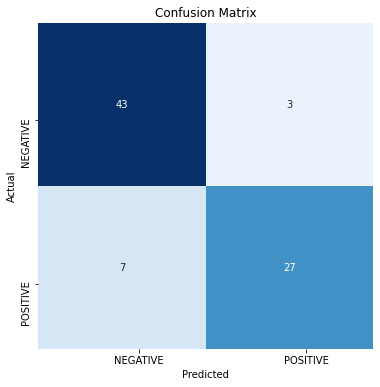

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.86      0.93      0.90        46
    POSITIVE       0.90      0.79      0.84        34

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.88      0.88      0.87        80



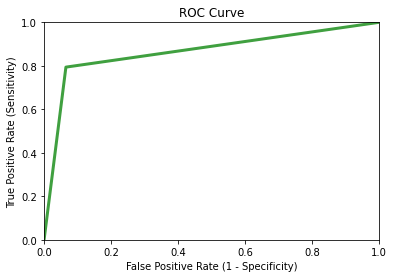

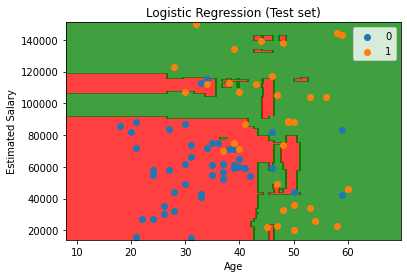

In [11]:
evaluate_model(rf, X_test)